# Resolving Sectors

In [ ]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import scipy as sp
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import tensorflow as tf
import random
import pickle as pkl

from qiskit.quantum_info import Operator, Statevector, random_unitary
from tqdm.notebook import tqdm
from analysis import Q_diff


from quantum_tools import diagonalize

from utils import loader


#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=1)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


## Implementation

In [ ]:
def compute_Q_diff(SO):
    if isinstance(SO, list):
        SO_list = SO
        Q_list = []
        for SO in SO_list:
            Q_list.append(compute_Q_diff(SO))
        
        return Q_list

    n = int(np.log2(SO.shape[0])//2)
    Q_d = Q_diff(n)
    
    eig_list, vec_L_list , vec_R_list = diagonalize(SO)

    Q_list = []
    for vec_R, vec_L in zip(vec_R_list, vec_L_list):
        Q_list.append(np.real(np.dot(vec_L.conj(), np.dot(Q_d, vec_R))))
    
    return Q_list

def Q_diff_distance(Q_list1, Q_list2):

    return np.linalg.norm(Q_list1 - Q_list2)


## Synthetic Retrived Models

In [11]:
model_list = loader("FF_traceout/models/model_list_FF_noisy_CM.model")
channel_list = loader("FF_traceout/data/FF_synthetic_benchmark.pkl")[0]

In [ ]:
SO_exp_list = [np.array(model.channel.superoperator) for model in model_list] 
SO_numeric_list = [np.array(channel.superoperator) for channel in channel_list]

In [27]:
print(SO_numeric_list[0])

[[ 1. +0.j   0. +0.j   0. +0.j  ...  0. +0.j   0. +0.j   0. +0.j ]
 [ 0. +0.j   0.5+0.1j -0.2+0.6j ...  0. +0.j   0. +0.j   0. +0.j ]
 [ 0. +0.j  -0. -0.1j  0.1+0.6j ...  0. +0.j   0. +0.j   0. +0.j ]
 ...
 [ 0. +0.j   0. +0.j   0. +0.j  ...  0. -0.1j -0. -0.j   0. +0.j ]
 [ 0. +0.j   0. +0.j   0. +0.j  ...  0.1+0.1j  0.1+0.j   0. +0.j ]
 [ 0. +0.j   0. +0.j   0. +0.j  ...  0. +0.j   0. +0.j   0.2+0.j ]]


In [26]:
print(SO_numeric_list[1])

[[ 1. +0.j   0. +0.j   0. +0.j  ...  0. +0.j   0. +0.j   0. +0.j ]
 [ 0. +0.j   0.4-0.1j  0.3-0.6j ...  0. +0.j   0. +0.j   0. +0.j ]
 [ 0. +0.j  -0.1+0.7j -0.5-0.2j ...  0. +0.j   0. +0.j   0. +0.j ]
 ...
 [ 0. +0.j   0. +0.j   0. +0.j  ... -0. +0.j  -0. +0.1j  0. +0.j ]
 [ 0. +0.j   0. +0.j   0. +0.j  ... -0. -0.1j  0.1+0.j   0. +0.j ]
 [ 0. +0.j   0. +0.j   0. +0.j  ...  0. +0.j   0. +0.j   0.1+0.j ]]


In [20]:
Q_exp_list = compute_Q_diff(SO_exp_list)
Q_numeric_list = compute_Q_diff(SO_numeric_list)

[0.0, -1.0, -1.0, -0.9999999999999996, -1.0, -2.0, -1.9999999999999996, -2.0, -2.0, -1.9999999999999998, -2.0000000000000004, -2.999999999999999, -3.0000000000000004, -2.9999999999999996, -3.0, 0.9999999999999998, 1.0000000000000004, 0.9999999999999999, 1.0000000000000004, 1.0000000000000007, 1.0, 1.0000000000000004, 1.0, 0.9999999999999999, 1.0, -1.1477065896851758e-30, 1.0, -1.0679490178796862e-29, 1.0, 1.0, -4.129910975712152e-30, 0.9999999999999997, -1.0, 2.1931400011598212e-30, -0.9999999999999998, 1.0078598095592813e-29, -3.785551397277234e-30, 2.0, -1.0, 2.601111160160783e-29, 1.9999999999999991, 1.0000000000000004, -1.0, -1.9999999999999991, 8.135238748557926e-31, -1.736820548922675e-30, -1.0, -0.9999999999999998, -1.0, -2.0, -1.8327492555784732e-30, 2.565041211475712e-30, -4.3267192813924444e-30, -2.99045124196219e-30, 1.3126283609573336e-30, -0.9999999999999999, 1.9999999999999998, -0.9999999999999998, -2.0, -0.9999999999999998, -1.0, 1.2760847919359962e-30, 5.913411336625774

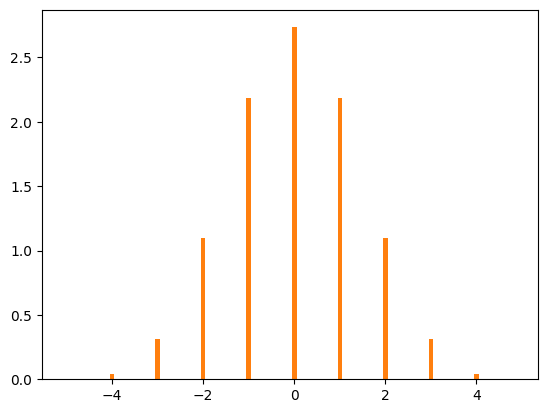

[0.0, -1.0, -0.9999999999999999, -1.0000000000000002, -1.0, -1.9999999999999996, -2.0000000000000004, -1.9999999999999998, -1.9999999999999996, -1.9999999999999996, -1.9999999999999996, -2.9999999999999996, -3.000000000000001, -3.0000000000000013, -3.0, 1.0000000000000002, 1.0000000000000002, 0.9999999999999999, 1.0000000000000002, 3.4091306979842213e-29, 2.027543198843396e-30, 1.1761316468610215e-30, -0.9999999999999999, 3.4987271772645583e-28, 2.0000000000000004, -0.9999999999999999, 0.9999999999999999, 2.440280059208906e-30, 1.0000000000000002, 1.0000000000000002, 0.9999999999999999, 1.0000000000000004, 1.0, -5.9734437319160376e-30, 3.1053277947427896e-30, 1.0, -1.0000000000000002, 1.8653902658350784e-29, 1.0, 1.9999999999999998, 0.9999999999999998, -0.9999999999999999, 9.3955039882608e-31, -1.0000000000000004, 1.0, 0.9999999999999998, 0.9999999999999999, 1.9999999999999996, -1.0, -2.0, -1.0, 1.0, 4.837495264986266e-30, 2.6659223700465727e-31, -2.000000000000001, -1.6073745305362246

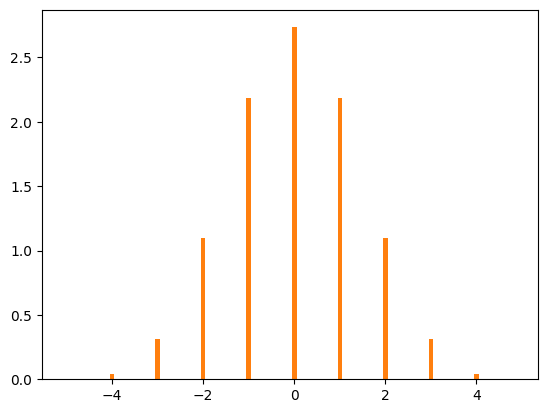

[0.0, -0.9999999999999994, -1.0, -0.9999999999999994, -0.9999999999999999, -2.0, -2.0, -1.9999999999999998, -2.0, -2.0, -2.0000000000000004, -2.999999999999999, -2.9999999999999996, -2.999999999999999, -2.999999999999999, 0.9999999999999994, 1.700448807335686e-30, 0.9999999999999998, 1.0000000000000007, 0.9999999999999993, 1.0000000000000004, 5.078746160293516e-30, 9.500515569271286e-30, -0.9999999999999993, -2.976833889860973e-30, -6.480680274237343e-32, 1.9999999999999993, -1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.9999999999999996, 1.0000000000000004, 1.0, 1.0, 1.0000000000000004, -1.8535937251672997e-29, -7.527951090776489e-30, 3.476025676323107e-30, -2.5100274790861776e-30, 4.498478130668164e-30, -3.279120781675065e-30, -1.0000000000000002, -0.9999999999999998, 1.9999999999999996, 0.9999999999999999, -1.9999999999999996, -0.9999999999999998, 0.9999999999999997, 1.0000000000000004, 3.1211485837640195e-29, 2.0670054106363174e-29, 1.0, 0.999999

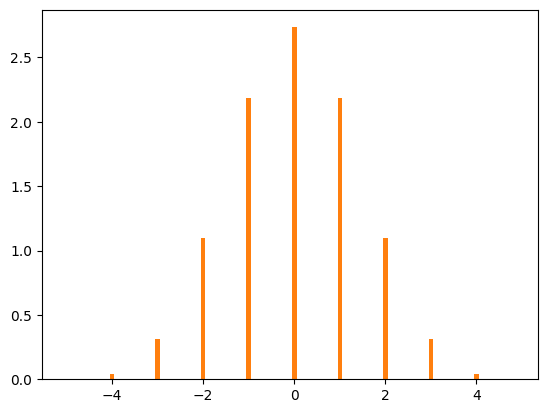

[0.0, -0.9999999999999999, -1.0, -1.0, -0.9999999999999998, -1.9999999999999996, -2.0, -2.0000000000000004, -2.0000000000000004, -2.000000000000001, -2.0, -3.0, -3.0, -3.0000000000000013, -3.0, 1.0, 1.0000000000000004, 0.9999999999999991, 1.0000000000000004, 9.296704268027644e-30, 5.7055389186285834e-30, -1.0000000000000007, -4.728642395311804e-30, -1.4269416024697583e-29, -0.9999999999999998, 2.0, 1.0000000000000002, 1.0000000000000004, 1.0000000000000002, 0.9999999999999996, 1.0000000000000004, 1.0000000000000004, 1.0000000000000002, 1.0, 1.0000000000000004, -2.597943039422211e-29, 0.9999999999999996, 0.9999999999999994, 8.407360471989806e-29, -2.206730289558032e-29, 2.0000000000000004, 1.0, 1.0, -6.6880476693863675e-28, -5.943418919485993e-28, 1.0000000000000004, 3.243965756454211e-30, -3.817831406813927e-29, -4.850966032696878e-29, 1.0272908658062533e-28, 2.0, -0.9999999999999998, 2.0, -1.0, -1.0, 2.0, -1.0000000000000004, -1.0, -1.0000000000000002, -0.9999999999999996, -0.99999999

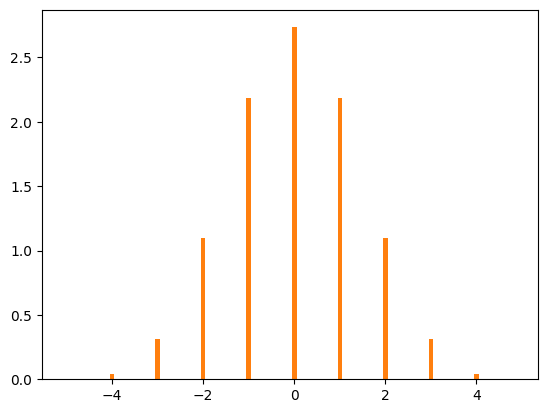

[0.0, -1.0, -0.9999999999999998, -1.0000000000000002, -1.0000000000000002, -2.000000000000001, -2.0, -2.0, -2.0, -2.0, -2.0, -2.9999999999999996, -2.999999999999999, -3.0000000000000004, -2.999999999999999, 1.0000000000000002, 1.0, 1.0000000000000002, -1.742903742097518e-30, 1.0000000000000004, 0.9999999999999999, 0.9999999999999998, 0.9999999999999999, 1.0, 1.0, 1.3901903962367708e-28, 1.0000000000000004, 1.0000000000000004, 4.8418089577053295e-29, 0.9999999999999998, -1.0, -1.0000000000000002, 2.0, -2.0, -2.0383899400059572e-29, 0.9999999999999999, -2.0, -0.9999999999999999, -0.9999999999999998, -1.0, 1.0000000000000002, 1.0000000000000004, 1.0, -1.0000000000000004, -1.0, -2.9999999999999996, 1.012168913959398e-29, 1.0, 0.9999999999999994, 6.843438297689372e-29, -1.9999999999999996, 2.9719979705846964e-29, 0.9999999999999998, 0.9999999999999999, 1.0, 0.9999999999999999, -0.9999999999999996, -1.0, -1.9999999999999996, -1.0, 8.767686950252697e-29, -1.8205214132273467e-29, 1.0, -1.00000

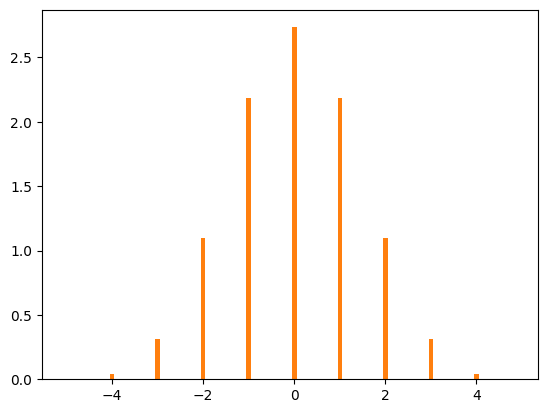

[0.0, -1.0, -1.0, -1.0, -0.9999999999999998, -1.9999999999999996, -2.0, -2.0000000000000004, -2.0, -2.000000000000001, -1.9999999999999998, -3.0000000000000004, -3.0, -2.999999999999999, -2.999999999999999, 1.0, 0.9999999999999996, 1.0, 1.0, 6.917065367915139e-29, 1.0000000000000002, 1.0, 1.0000000000000007, 2.0, 1.0000000000000007, 1.0000000000000004, 0.9999999999999998, 1.0, 3.3771740536151525e-30, 0.9999999999999998, 0.9999999999999996, 1.0000000000000002, -1.0, -1.999999999999999, 0.9999999999999998, 1.0, 0.9999999999999996, 1.0, 1.0000000000000002, 2.000000000000001, -4.301797575698448e-28, 0.9999999999999997, -0.9999999999999997, 0.9999999999999998, 1.0, 0.9999999999999999, 0.9999999999999997, 1.0, 0.9999999999999999, 0.9999999999999998, 1.0, 0.9999999999999999, -1.9999999999999991, -1.0000000000000007, 2.0, 1.7362416361296917e-27, 0.9999999999999998, -0.9999999999999996, -3.0, 1.0000000000000002, 0.9999999999999999, 5.094109068693475e-28, 0.9999999999999997, 2.9625489222641933e-

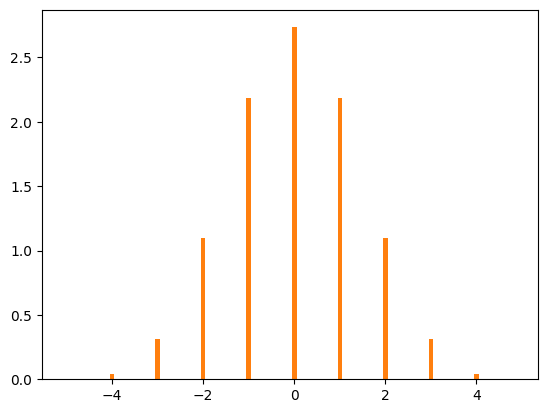

[0.0, -0.9999999999999998, -1.0, -0.9999999999999996, -1.0000000000000004, -1.9999999999999991, -1.9999999999999998, -1.9999999999999996, -2.0, -1.9999999999999996, -2.0, -2.999999999999999, -2.9999999999999996, -2.9999999999999996, -2.999999999999999, 1.0000000000000002, 0.9999999999999997, 1.0000000000000002, 1.0000000000000002, 0.9999999999999997, 1.0000000000000004, 1.0, 1.0000000000000004, 0.9999999999999993, 1.0000000000000004, 1.0, 0.9999999999999996, 1.0000000000000009, 1.0, 1.0000000000000004, -1.8983145897386813e-31, 2.41169407239073e-31, -1.5680103455023503e-30, -1.0, 1.094020324240153e-29, -1.0000000000000002, -1.839008870995748e-29, 1.2850636361870334e-30, -1.0, -3.3947116380607016e-30, -1.0000000000000004, -1.0000000000000002, -1.0000000000000007, 1.5455679041431577e-29, -0.9999999999999999, 1.8393930602153571e-28, -2.0, -2.0, -1.0, 2.0, -1.0, 2.0, -2.000000000000001, 2.0000000000000004, -2.218755350196521e-29, 3.4719490274861044e-31, -1.8279761211551952e-31, 8.0150795902

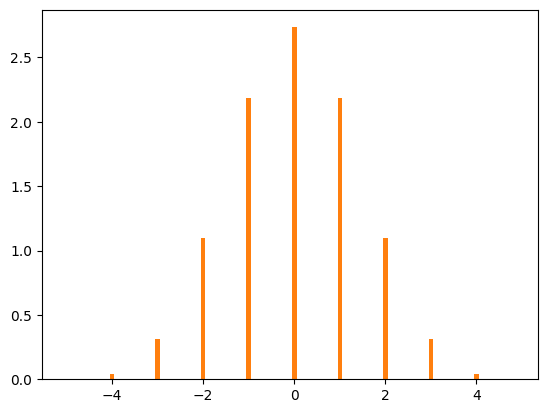

[0.0, -0.9999999999999998, -1.0, -1.0, -1.0, -2.0, -2.0, -1.9999999999999998, -1.9999999999999993, -1.9999999999999996, -2.0000000000000004, -3.0000000000000004, -3.0000000000000013, -3.0, -3.000000000000001, 0.9999999999999999, 1.0000000000000004, 1.0000000000000002, 1.0, 1.0000000000000002, 6.182359803775858e-29, 1.0000000000000004, 0.9999999999999998, 1.0000000000000002, 1.0, 0.9999999999999998, 1.4669544107076648e-29, 1.0000000000000007, 1.0000000000000002, 1.0000000000000004, 1.0, 1.0000000000000002, 1.0, 0.9999999999999998, 1.0, -4.5671883838872466e-29, 0.9999999999999999, 3.574895889439655e-29, -1.0000000000000002, 2.0, 1.5909689011700998e-29, 4.5722769300018485e-28, -2.0, 0.9999999999999999, -1.0000000000000002, -1.0000000000000002, -1.0, -0.9999999999999998, 2.4916837738992525e-29, -1.0, -2.0, 6.413781933269051e-28, 1.0659949746879144e-27, 1.348207410060967e-29, 4.743237152502465e-29, -2.0000000000000004, 8.93896738055231e-28, -1.0, -1.0, 1.0000000000000004, 0.9999999999999999

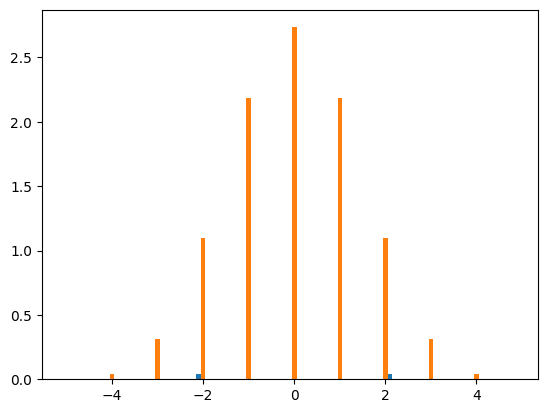

[0.0, -0.9999999999999999, -0.9999999999999999, -1.0000000000000004, -1.0000000000000002, -2.0, -2.0, -2.0, -1.9999999999999996, -2.0, -2.0, -2.9999999999999996, -2.9999999999999996, -3.0, -3.0, 0.9999999999999999, 1.0000000000000004, 1.0, 0.9999999999999998, 1.0, 1.0000000000000002, -4.7555606321752607e-29, 1.0000000000000002, 1.0000000000000002, 1.0, 5.88294292164173e-30, 0.9999999999999998, 1.0, 8.272675196493963e-30, 1.9999999999999998, 0.9999999999999998, 0.9999999999999999, -1.2382124375317205e-29, 1.0, 1.0000000000000004, 1.0000000000000002, 0.9999999999999999, -9.560527538409617e-30, 1.0000000000000004, 1.0000000000000002, 1.0000000000000004, 2.000000000000001, 2.2642217783621507e-29, 2.9751550078400883e-29, 2.883174167572972e-30, 1.6872297850744547e-30, 2.0, 1.1573322433952673e-29, 0.9999999999999998, -2.455691921611222e-28, 1.0, -0.9999999999999999, 2.0000000000000004, -1.0, -1.0000000000000002, 1.0, -3.4703598796804553e-29, -4.647860438336111e-29, 0.9999999999999993, 1.00000

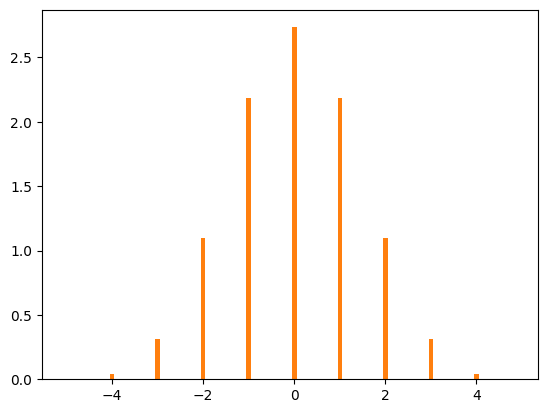

[0.0, -0.9999999999999998, -1.0, -1.0000000000000004, -1.0000000000000002, -2.000000000000001, -1.9999999999999993, -2.0, -2.0000000000000004, -2.0, -2.0000000000000004, -3.0000000000000004, -3.0000000000000004, -2.9999999999999996, -2.999999999999999, 1.0, 0.9999999999999993, 0.9999999999999998, 1.0, 1.0, 1.0, 7.525249910769523e-30, 0.9999999999999998, 1.0000000000000004, 1.0000000000000002, -1.4118124042869875e-30, 1.0, -1.0557565702319586e-29, -1.0, -4.047317924340532e-29, 1.0000000000000002, 1.0, 0.9999999999999999, -1.0000000000000004, 4.122321532368598e-30, -7.705716659510887e-30, 1.0, 0.9999999999999999, 3.104139054922064e-27, -0.9999999999999998, 2.3967468600680797e-29, -0.9999999999999999, -1.0000000000000002, 1.9999999999999998, -6.447883529551271e-30, -0.9999999999999998, 2.0, -1.0000000000000004, -2.0000000000000004, 1.9999999999999996, -1.183042040402794e-28, -2.0000000000000004, -1.0, -1.9999999999999991, -1.0, 1.6345488652532595e-29, 4.222267831619352e-29, 9.460537134328

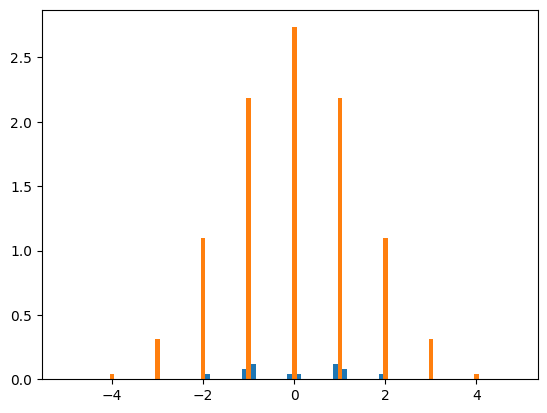

In [38]:
# bins centered at integer values between -5 and 5
bins = np.arange(-5, 5, 0.1) - 0.05

for i in range(10):
    plt.hist(Q_exp_list[i], bins=bins, density=True)
    plt.hist(Q_numeric_list[i], bins=bins, density=True)
    print(Q_numeric_list[i])
    print(Q_exp_list[i])
    plt.show()